# Looking at where incidents are occurring: County-level analysis
Are pipelines breaking that were installed after 2010 breaking in areas with higher population density than pre-2010?

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Load data

In [2]:
df_raw = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all_CLEAN.csv')
df_raw.columns

Index(['datafile_as_of', 'ff', 'significant', 'serious', 'report_number',
       'supplemental_number', 'report_received_date', 'report_type',
       'operator_id', 'name', 'operator_street_address', 'operator_city_name',
       'operator_state_abbreviation', 'operator_postal_code', 'local_datetime',
       'time_zone', 'daylight_savings_ind', 'iyear', 'location_street_address',
       'location_city_name', 'location_county_name',
       'location_state_abbreviation', 'location_postal_code',
       'location_latitude', 'location_longitude', 'total_cost',
       'total_cost_current', 'injury_ind', 'injure', 'num_pub_evacuated',
       'fatal', 'cause', 'cause_details', 'material_involved',
       'material_details', 'narrative', 'unintentional_release',
       'installation_year', 'decade'],
      dtype='object')

In [3]:
df_raw.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010,1617 EAST 9TH STREET,STOCKTON,SAN JOAQUIN,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,801 E 86TH AVENUE,MERRILLVILLE,IN,46410,2/16/10 10:38,NaN,NaN,2010,3835 SANDPIPER COVE RUN,SOUTH BEND,ST. JOSEPH,IN,46628,41.72931,-86.27531,57500,68334.121206,NO,0,20.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"CONTRACTOR BORING ELECTRIC LINE PARALLEL TO 3""...",310.0,1990-01-01,1990-1999


### Clean county names for merging with Census population data

In [4]:
# convert county name to title case
df_raw['location_county_name'] = df_raw.location_county_name.str.title()

In [5]:
# get full state names instead of abbreviations

# load in CSV with state abbreviations and full names
df_state_abbvs = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
df_state_abbvs.head()

# merge dataframes to get a 'State' column with the state name
df_raw = df_raw.merge(df_state_abbvs, left_on='location_state_abbreviation', right_on='Abbreviation')
df_raw.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,State,Abbreviation
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010,1617 EAST 9TH STREET,STOCKTON,San Joaquin,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN,California,CA
1,2/28/22,NO,NO,NO,20100022,15025,5/10/10,ORIGINAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,1/9/10 16:27,NaN,NaN,2010,HEMLOCK ST & O ST,EUREKA,Humboldt,CA,95501,40.77320,-124.15280,2500,3043.026398,NO,0,16.0,0,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",STEEL,NaN,ON 1/19/10 AT APPROXIMATELY 1627 HOURS A 6.5 M...,102.0,NaN,NaN,California,CA


In [6]:
# creating new column with full state name instead of state abbreviation
df_raw['county_full_name'] = df_raw['location_county_name'] + " County, " + df_raw['State']
df_raw.county_full_name.head()

0    San Joaquin County, California
1       Humboldt County, California
2     Sacramento County, California
3    San Joaquin County, California
4     Stanislaus County, California
Name: county_full_name, dtype: object

## Load Census population data

In [7]:
# census population data downloaded from Decennial Census 2020 P1 Race table
df_population = pd.read_csv('../data/source/DECENNIALPL2020.P1_2022-04-27T211220_COUNTIES/DECENNIALPL2020.P1_data_with_overlays_2022-04-26T230600.csv')

# drop first row
df_population = df_population.iloc[1:]

# keep only GEO_ID, NAME (area), P1_001N (total)
df_population = df_population[['GEO_ID', 'NAME', 'P1_001N']]

# convert P1_001N to numeric
df_population.P1_001N = df_population.P1_001N.astype(int)

df_population.head()

,GEO_ID,NAME,P1_001N
1,0500000US01001,"Autauga County, Alabama",58805
2,0500000US01003,"Baldwin County, Alabama",231767
3,0500000US01005,"Barbour County, Alabama",25223
4,0500000US01007,"Bibb County, Alabama",22293
5,0500000US01009,"Blount County, Alabama",59134


## Merge dataframes

In [8]:
df_merge = df_raw.merge(df_population, left_on='county_full_name', right_on='NAME', how ='left')
df_merge.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,State,Abbreviation,county_full_name,GEO_ID,NAME,P1_001N
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010,1617 EAST 9TH STREET,STOCKTON,San Joaquin,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN,California,CA,"San Joaquin County, California",0500000US06077,"San Joaquin County, California",779233.0
1,2/28/22,NO,NO,NO,20100022,15025,5/10/10,ORIGINAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,1/9/10 16:27,NaN,NaN,2010,HEMLOCK ST & O ST,EUREKA,Humboldt,CA,95501,40.77320,-124.15280,2500,3043.026398,NO,0,16.0,0,NATURAL FORCE DAMAGE,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",STEEL,NaN,ON 1/19/10 AT APPROXIMATELY 1627 HOURS A 6.5 M...,102.0,NaN,NaN,California,CA,"Humboldt County, California",0500000US06023,"Humboldt County, California",136463.0


## Analyze by county

In [9]:
df_merge.groupby('decade').P1_001N.mean()

decade
1900-1909    1.651421e+06
1910-1919    1.793561e+06
1920-1929    1.946104e+06
1930-1939    1.922754e+06
1940-1949    2.053062e+06
1950-1959    1.296916e+06
1960-1969    1.183644e+06
1970-1979    1.282280e+06
1980-1989    1.333264e+06
1990-1999    9.466829e+05
2000-2009    1.105683e+06
>2010        1.067947e+06
Name: P1_001N, dtype: float64

<AxesSubplot:xlabel='decade'>

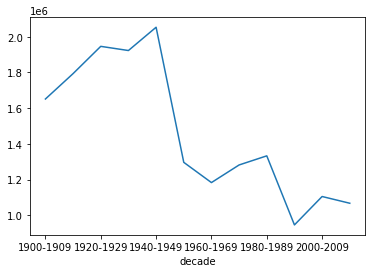

In [10]:
df_merge.groupby('decade').P1_001N.mean().plot()

In [11]:
df_merge.groupby('decade').P1_001N.median()

decade
1900-1909    1694251.0
1910-1919    1793561.0
1920-1929    1304127.0
1930-1939     919489.5
1940-1949    1004457.0
1950-1959     674721.0
1960-1969     431279.0
1970-1979     632043.5
1980-1989     584526.0
1990-1999     423635.0
2000-2009     495747.0
>2010         486492.0
Name: P1_001N, dtype: float64

<AxesSubplot:xlabel='decade'>

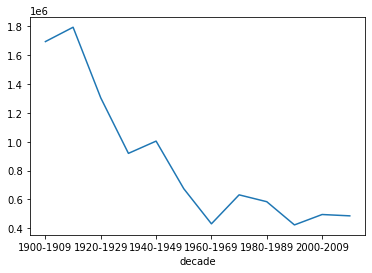

In [12]:
df_merge.groupby('decade').P1_001N.median().plot()